In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emcee

from question_3 import UniformPrior, Likelihood, LogProb, AutocorrelationTime, Template
from data_loader import Data

In [13]:
filepath = 'simple-cw-master/'
filename = 'cw_' + 'example' + '.csv'

data = Data(filepath + filename)

In [20]:
ndim = 2
nwalkers = 4
steps = 2000
# (epsilon, fdot): true value for epsilon is 1e-6, true value for fdot is 1e-4

epsilon_lower_bound = 0.5e-6
epsilon_upper_bound = 20e-6

df_dt_lower_bound = 0.5e-6
df_dt_upper_bound = 20e-4

prior_lower_bounds = (epsilon_lower_bound, df_dt_lower_bound)
prior_upper_bounds = (epsilon_upper_bound, df_dt_upper_bound)

# prior_lower_bounds = (0, 0)
# prior_upper_bounds = (1e-4, 1e-3)

In [21]:
prior = UniformPrior(lower_bounds=prior_lower_bounds, upper_bounds=prior_upper_bounds) # initialize the prior, which is uniform (1 in allowed region, 0 otherwise)
likelihood = Likelihood() # initialize likelihood function
log_prob = LogProb(likelihood=likelihood, prior=prior) # pass likelihood function and prior into log_probability, where log_prob = log_likelihood + log_prior

In [22]:
p0 = np.random.uniform(size=(nwalkers, ndim), low=prior_lower_bounds, high=prior_upper_bounds) # random initial guesses, using the same bounds as the prior

In [23]:
dtype=[('log_like', float)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[data.times, data.signal, data.f_rot0], blobs_dtype=dtype) # initialize MCMC sampler

In [24]:
sampler.run_mcmc(p0, steps, progress=True) # run MCMC sampler

100%|██████████████████████████████████████| 2000/2000 [00:19<00:00, 104.96it/s]


State([[1.31323090e-05 1.03532285e-04]
 [1.29613629e-05 9.64331101e-05]
 [2.33357386e-06 1.49713919e-03]
 [1.32379053e-05 1.03533592e-04]], log_prob=[ -7.7088246   -7.58798441 -97.77146188  -7.80390711], blobs=[( -7.7088246 ,) ( -7.58798441,) (-97.77146188,) ( -7.80390711,)], random_state=('MT19937', array([1256203862,  239499713, 2084944930, 2274106283, 1323631981,
       3200643428, 2317134425, 3274609972, 3916968553, 3238411817,
       1717777737, 1166974890, 1972904167, 1428081499, 3984757745,
       3748899861, 1461657366, 2509342631, 2956855683, 1116584484,
        825653169,   74112267, 1821952796, 3335022044, 1159280465,
       3584906648,  397161319, 1762758249, 3400147442,  148041759,
       1124036849, 1211457512, 2725894593, 3718994992, 1219125730,
        247167014, 1249384010, 4023017288, 2112954974, 3100187338,
       1111177449,   49603968, 2938923185,  633915289,   13729200,
       4086732542, 2760854451, 2468432273, 3186191377, 1842480556,
        183439296, 114737812

In [19]:
# print(sampler.get_autocorr_time())

# autocorrelation_time = int(np.ceil(np.max(sampler.get_autocorr_time())))

# print(autocorrelation_time)

[nan nan]


ValueError: cannot convert float NaN to integer

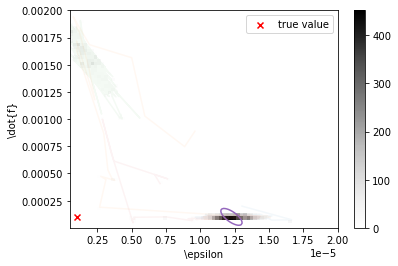

In [25]:
flat_samples = sampler.get_chain(flat=True) # get flattened samples for plotting histograms
samples = sampler.get_chain() # get samples for plotting individual chains

# epsilon_points = flat_samples[:, 0][::autocorrelation_time]
# df_dt_points = flat_samples[:, 1][::autocorrelation_time]

# epsilon_walk = samples[:, :, 0][::autocorrelation_time]
# df_dt_walk = samples[:, :, 1][::autocorrelation_time]


epsilon_points = flat_samples[:, 0]
df_dt_points = flat_samples[:, 1]

epsilon_walk = samples[:, :, 0]
df_dt_walk = samples[:, :, 1]


plt.figure() # plot histogram, contour plot, and chains all overlaid, with true value incidated

plt.plot(epsilon_walk, df_dt_walk, alpha=0.05)
sns.kdeplot(x=epsilon_points, y=df_dt_points, levels=[0.9])
plt.hist2d(x=epsilon_points, y=df_dt_points, bins=64, cmap='Greys')
plt.colorbar()

plt.scatter([1e-6], [1e-4], label='true value', color='red', marker='x')
plt.legend()

plt.xlabel(r'\epsilon')
plt.ylabel(r'\dot{f}')

plt.ylim((df_dt_lower_bound, df_dt_upper_bound))
plt.xlim((epsilon_lower_bound, epsilon_upper_bound))

plt.show()

chain 0 (epsilon, fdot): 1.3132308978027121e-05 0.00010353228493858995
chain 1 (epsilon, fdot): 1.29613628819261e-05 9.643311008418386e-05
chain 2 (epsilon, fdot): 2.3335738564971347e-06 0.001497139189382681
chain 3 (epsilon, fdot): 1.3237905334698943e-05 0.00010353359211006938


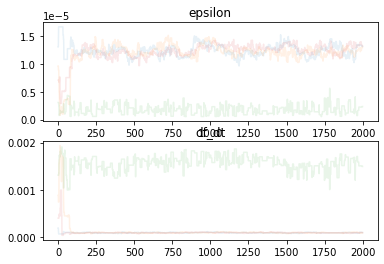

In [26]:
samples = np.swapaxes(samples, 0, 1)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) # trace plots for each parameter

for i, chain in enumerate(samples):
#     ax1.plot(chain.T[0][::autocorrelation_time], alpha=0.1)
#     ax2.plot(chain.T[1][::autocorrelation_time], alpha=0.1)
    ax1.plot(chain.T[0], alpha=0.1)
    ax2.plot(chain.T[1], alpha=0.1)

    print('chain %i (epsilon, fdot):' %i, chain.T[0, -1], chain.T[1, -1])

ax1.set_title('epsilon')
ax2.set_title('df_dt')
plt.show()

In [27]:
blobs = sampler.get_blobs()
log_likelihoods = np.swapaxes(blobs['log_like'], 0, 1)
print(log_likelihoods)
print('------------------------------------------------------------------------------------------')
print(samples)

[[ -84.65262945  -84.65262945  -28.5352165  ...   -7.70248835
    -7.72588892   -7.7088246 ]
 [-135.62346879 -135.62346879 -119.68303616 ...   -7.71953632
    -7.58798441   -7.58798441]
 [ -97.95942186  -97.95942186  -97.95942186 ...  -97.77146188
   -97.77146188  -97.77146188]
 [ -99.25842524  -99.25842524  -99.25842524 ...   -7.80390711
    -7.80390711   -7.80390711]]
------------------------------------------------------------------------------------------
[[[1.30430689e-05 1.99860953e-04]
  [1.30430689e-05 1.99860953e-04]
  [1.47317008e-05 1.41295903e-04]
  ...
  [1.31247082e-05 1.03532191e-04]
  [1.31523855e-05 1.03532533e-04]
  [1.31323090e-05 1.03532285e-04]]

 [[9.61875691e-06 8.89461262e-04]
  [9.61875691e-06 8.89461262e-04]
  [8.86840997e-06 7.46933186e-04]
  ...
  [1.29198927e-05 9.46307932e-05]
  [1.29613629e-05 9.64331101e-05]
  [1.29613629e-05 9.64331101e-05]]

 [[3.05328569e-06 1.31322699e-03]
  [3.05328569e-06 1.31322699e-03]
  [3.05328569e-06 1.31322699e-03]
  ...
  [2

In [28]:
check_chain = samples[-1]
check_epsilon = chain.T[0, -1]
check_df_dt = chain.T[1, -1]

check_template = Template(epsilon=check_epsilon, df_dt=check_df_dt, f_rot0=data.f_rot0)
check_model = check_template(data.times)
likelihood = Likelihood()
check_likelihood = np.log(likelihood(check_model, data.signal))
print('likelihood for params (epsilon, fdot) = (%f, %f) is %f' %(check_epsilon, check_df_dt, check_likelihood))

likelihood for params (epsilon, fdot) = (0.000013, 0.000104) is -7.803907


In [29]:
class Evaluate:
    def __init__(self, f_rot0, times, signal):
        self.f_rot0 = f_rot0
        self.times = times
        self.signal = signal
    
    def __call__(self, epsilon, df_dt):
        template = Template(epsilon=epsilon, df_dt=df_dt, f_rot0=self.f_rot0)
        model = template(self.times)
        likelihood = Likelihood()
        result = np.log(likelihood(model, self.signal))
        
        return result

In [30]:
epsilon_resolution = 50
df_dt_resolution = 50

epsilon_coords = np.linspace(epsilon_lower_bound, epsilon_upper_bound, epsilon_resolution)
df_dt_coords = np.linspace(df_dt_lower_bound, df_dt_upper_bound, df_dt_resolution)

grid = np.meshgrid(epsilon_coords, df_dt_coords)
epsilon_arr, df_dt_arr = grid

In [31]:
evaluate = Evaluate(data.f_rot0, data.times, data.signal)

coords = []
likelihood_values = []

for epsilon_value in epsilon_coords:
    for df_dt_value in df_dt_coords:
        coords.append((epsilon_value, df_dt_value))
        likelihood_values.append(evaluate(epsilon_value, df_dt_value))

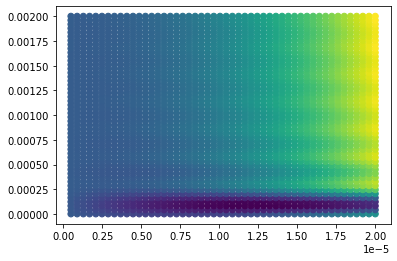

In [32]:
epsilon_plot = [coord[0] for coord in coords]
df_dt_plot = [coord[1] for coord in coords]

normalized_likelihood_values = likelihood_values / np.max(likelihood_values)

plt.scatter(epsilon_plot, df_dt_plot, c = normalized_likelihood_values)